In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
mall_data = pd.read_csv('Mall_Customers.csv')

print(f'No. of rows: {mall_data.shape[0]}\nNo. of columns: {mall_data.shape[1]}')

No. of rows: 200
No. of columns: 5


In [172]:
mall_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [173]:
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [174]:
# Check for null values
mall_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

C:\Users\pooh_\AppData\Local\Temp\ipykernel_10960\4200141842.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(male_age_data, bins=age_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
C:\Users\pooh_\AppData\Local\Temp\ipykernel_10960\4200141842.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed

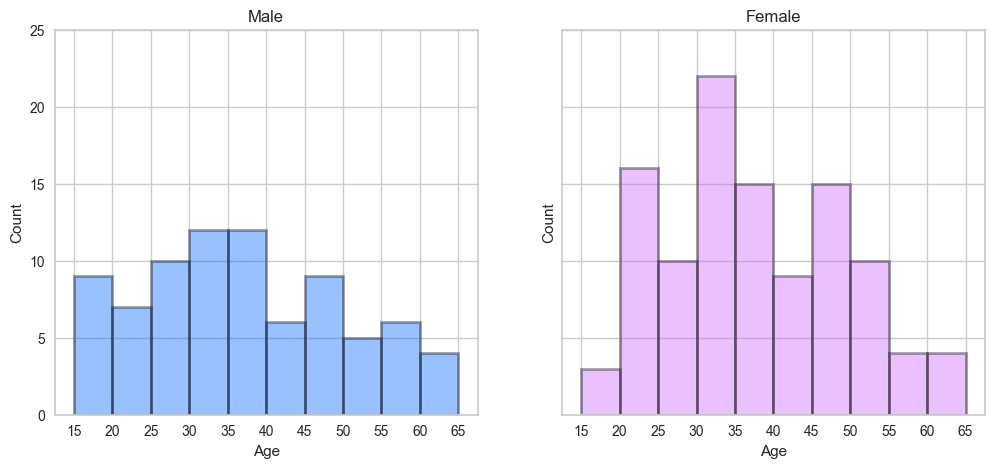

In [175]:
# separate male and female age
male_age_data = mall_data[mall_data['Gender']=='Male']['Age']
female_age_data = mall_data[mall_data['Gender']=='Female']['Age']

age_bins = range(15,70,5)

# male histogram
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
sns.distplot(male_age_data, bins=age_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title('Male')
ax1.set_ylabel('Count')

# female histogram
sns.distplot(female_age_data, bins=age_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(age_bins)
ax2.set_title('Female')
ax2.set_ylabel('Count')

plt.show()

In [176]:
print(f'Sum of males: {male_age_data.shape[0]}'),
print(f'Sum of females: {female_age_data.shape[0]}')

Sum of males: 88
Sum of females: 112


Mean male income: 62.22727272727273
Median male income: 62.5
Mean female income: 59.25
Median female income: 60.0


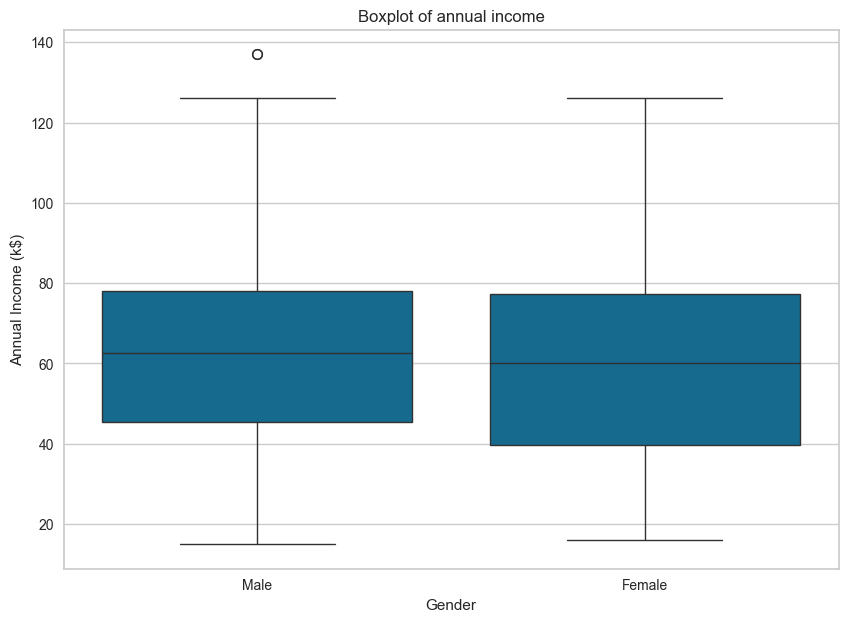

In [177]:
# separate male and female income
male_income_data = mall_data[mall_data['Gender']=='Male']['Annual Income (k$)'] 
female_income_data = mall_data[mall_data['Gender']=='Female']['Annual Income (k$)']

print(f'Mean male income: {male_income_data.mean()}')
print(f'Median male income: {male_income_data.median()}')

print(f'Mean female income: {female_income_data.mean()}')
print(f'Median female income: {female_income_data.median()}')

# boxplot
fig, ax = plt.subplots(1,1, figsize = (10,7))
sns.boxplot(x='Gender', y='Annual Income (k$)', data=mall_data, ax=ax)
ax.set_title('Boxplot of annual income')
plt.show()



Mean and median income for both male and females are similar so nothing to preprocess.

Mean male spending: 62.22727272727273
Median male spending: 62.5
Mean female spending: 59.25
Median female spending: 60.0


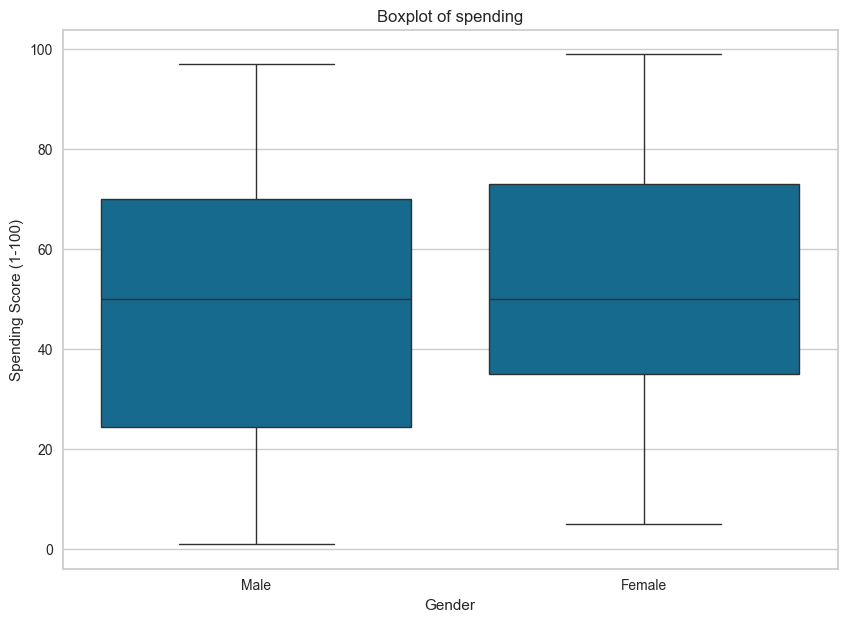

In [178]:
# separate male and female spendings
male_spend_data = mall_data[mall_data['Gender']=='Male']['Spending Score (1-100)'] 
female_spend_data = mall_data[mall_data['Gender']=='Female']['Spending Score (1-100)'] 

print(f'Mean male spending: {male_income_data.mean()}')
print(f'Median male spending: {male_income_data.median()}')

print(f'Mean female spending: {female_income_data.mean()}')
print(f'Median female spending: {female_income_data.median()}')

# boxplot
fig, ax = plt.subplots(1,1, figsize = (10,7))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=mall_data, ax=ax)
ax.set_title('Boxplot of spending')
plt.show()

Find correlations

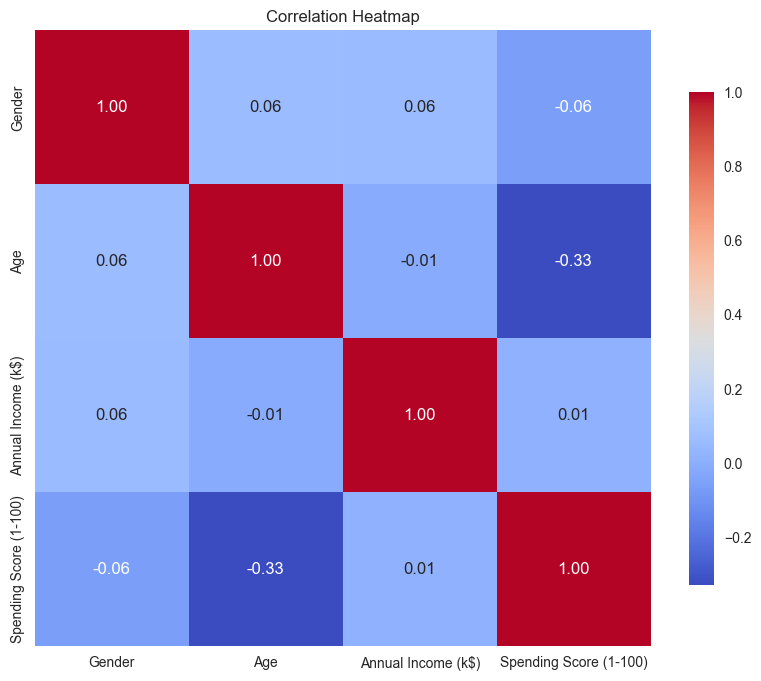

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
le = LabelEncoder()

# Drop CustomerID since it is unnecessary
mall_data_dropped = mall_data.drop(columns=['CustomerID'])

# Apply the label encoder to the 'Gender' column
mall_data_dropped['Gender'] = le.fit_transform(mall_data['Gender'])

# Calculate the correlation matrix
correlation_matrix = mall_data_dropped.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Set titles and labels
plt.title('Correlation Heatmap')
plt.show()


No significant correlations hence no redundant columns.

In [4]:
from sklearn.cluster import KMeans 

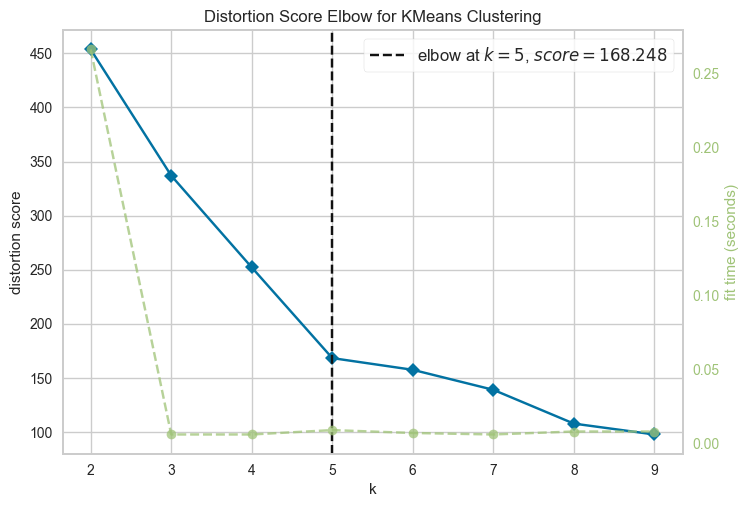

In [5]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler

numeric_df = mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] 

# Scale the data
numeric_df_scaled = StandardScaler().fit_transform(numeric_df)

# Convert the scaled data to a DataFrame
numeric_df_scaled = pd.DataFrame(numeric_df_scaled, columns=numeric_df.columns)

# We use elbow method to choose number of clusters
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(numeric_df_scaled)
visualizer.show()
plt.show()

Additionally, we can also use silhouette score to determine number of clusters for confirmation.

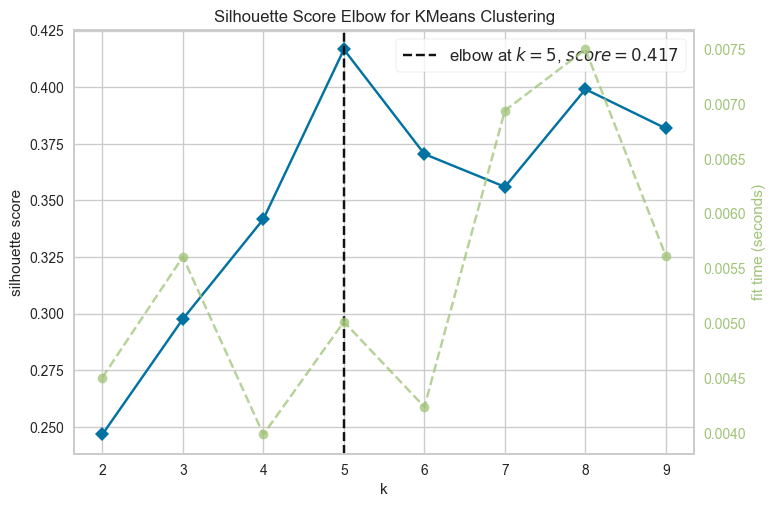

In [182]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(numeric_df_scaled)
visualizer.show()
plt.show()

Silhouette score also peaks at k=5 so we choose k=5.

In [183]:
# Use kmeans++ initiation to help speed up clustering
kmeans_model = KMeans(n_clusters=5, init='k-means++').fit(numeric_df_scaled)

# Obtain cluster labels and center
cluster_labels = kmeans_model.labels_
centers = kmeans_model.cluster_centers_

# Add cluster labels into the dataframe
numeric_df_scaled_clustered = numeric_df_scaled.copy()
numeric_df_scaled_clustered['Cluster Label'] = cluster_labels
numeric_df_scaled_clustered

,Age,Annual Income (k$),Spending Score (1-100),Cluster Label
0,-1.424569,-1.738999,-0.434801,3
1,-1.281035,-1.738999,1.195704,3
2,-1.352802,-1.700830,-1.715913,4
3,-1.137502,-1.700830,1.040418,3
4,-0.563369,-1.662660,-0.395980,3
...,...,...,...,...
195,-0.276302,2.268791,1.118061,2
196,0.441365,2.497807,-0.861839,0
197,-0.491602,2.497807,0.923953,2
198,-0.491602,2.917671,-1.250054,0


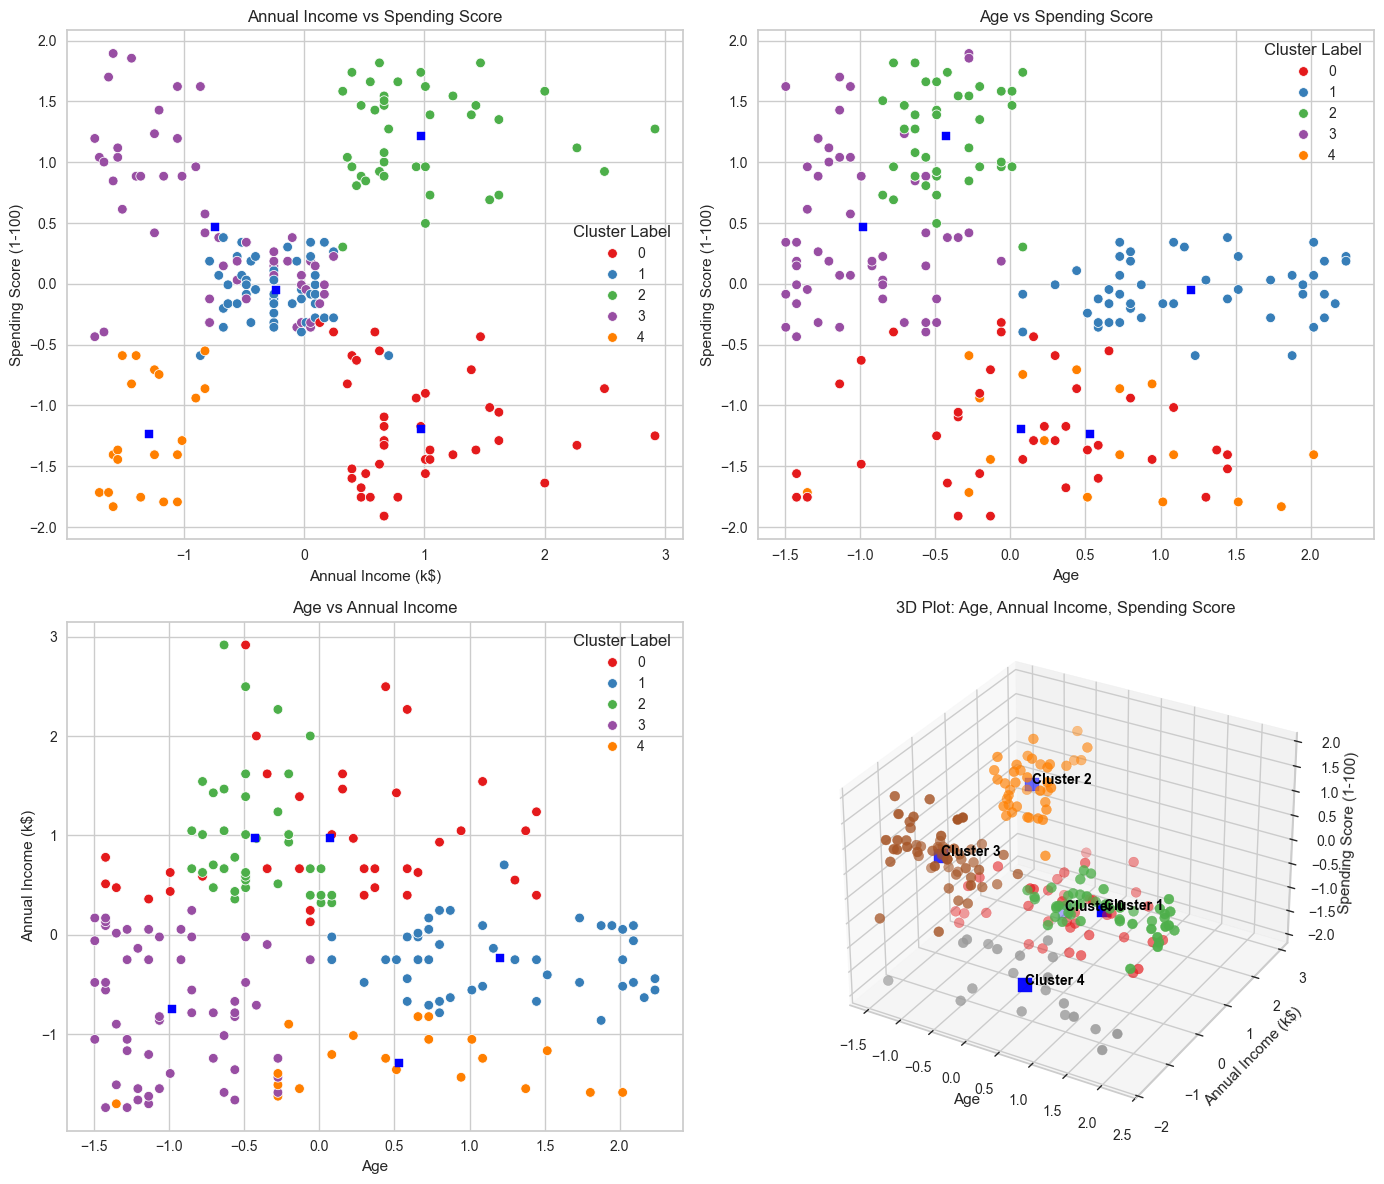

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Create subplots with 2D and 3D plots
fig = plt.figure(figsize=(14, 12))  # Adjust the figure size for 2 rows

# First 2D scatterplot (Annual Income vs Spending Score)
ax1 = fig.add_subplot(2, 2, 1)  # Change the layout to 2 rows and 2 columns
scatplot1 = sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', 
                            data=numeric_df_scaled_clustered, 
                            hue='Cluster Label', 
                            palette='Set1', ax=ax1, legend='full')
ax1.scatter(centers[:,1], centers[:,2], marker='s', s=40, c="blue")
ax1.set_title('Annual Income vs Spending Score')

# Second 2D scatterplot (Age vs Spending Score)
ax2 = fig.add_subplot(2, 2, 2)
scatplot2 = sns.scatterplot(x='Age', y='Spending Score (1-100)', 
                            data=numeric_df_scaled_clustered, 
                            hue='Cluster Label', 
                            palette='Set1', ax=ax2, legend='full')
ax2.scatter(centers[:,0], centers[:,2], marker='s', s=40, c="blue")
ax2.set_title('Age vs Spending Score')

# Third 2D scatterplot (Age vs Annual Income)
ax3 = fig.add_subplot(2, 2, 3)
scatplot3 = sns.scatterplot(x='Age', y='Annual Income (k$)', 
                            data=numeric_df_scaled_clustered, 
                            hue='Cluster Label', 
                            palette='Set1', ax=ax3, legend='full')
ax3.scatter(centers[:,0], centers[:,1], marker='s', s=40, c="blue")
ax3.set_title('Age vs Annual Income')

# 3D scatterplot (Age vs Annual Income vs Spending Score)
ax4 = fig.add_subplot(2, 2, 4, projection='3d')
scatplot4 = ax4.scatter(numeric_df_scaled_clustered['Age'], 
                        numeric_df_scaled_clustered['Annual Income (k$)'], 
                        numeric_df_scaled_clustered['Spending Score (1-100)'], 
                        c=numeric_df_scaled_clustered['Cluster Label'], 
                        cmap='Set1', s=50)

# Plot cluster centers in 3D and label them
ax4.scatter(centers[:,0], centers[:,1], centers[:,2], marker='s', s=100, c="blue")

# Set labels and title for the 3D plot
ax4.set_xlabel('Age')
ax4.set_ylabel('Annual Income (k$)')
ax4.set_zlabel('Spending Score (1-100)')
ax4.set_title('3D Plot: Age, Annual Income, Spending Score')

# Add text labels for the cluster centers
for i, center in enumerate(centers):
    ax4.text(center[0], center[1], center[2], f'Cluster {i}', color='black', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


In [185]:
# Size of each cluster
cluster_size = numeric_df_scaled_clustered.groupby('Cluster Label').size().to_frame()
cluster_size.columns = ["Cluster Size"]
cluster_size

,Cluster Size
Cluster Label,
0,39
1,47
2,40
3,54
4,20


From here we can see the biggest cluster belongs to the group with relatively low annual income with medium spending and younger age. The smallest group belongs to the group with low annual income with low spending and medium age.

In [186]:
from sklearn.metrics import silhouette_score

# Separate features and cluster labels
features = numeric_df_scaled_clustered[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
labels = numeric_df_scaled_clustered['Cluster Label']

# Calculate the silhouette score
score = silhouette_score(features, labels)

print("Overall Silhouette Score:", score)

Overall Silhouette Score: 0.41664341513732767


Now we find DBI score

In [187]:
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans

# Assume numeric_df is your dataframe and you have already fitted your KMeans model
kmeans_model = KMeans(n_clusters=5, init='k-means++').fit(numeric_df)

# Get the cluster labels and centers
cluster_labels = kmeans_model.labels_
centers = kmeans_model.cluster_centers_

# Calculate the intra-cluster distance for each cluster
def intra_cluster_distance(X, labels, centers):
    return np.array([np.mean(pairwise_distances(X[labels == i], [centers[i]])) for i in range(len(centers))])

# Calculate the inter-cluster distance matrix
def inter_cluster_distance(centers):
    return pairwise_distances(centers)

# Calculate DBI
def davies_bouldin_index(X, labels):
    n_clusters = len(np.unique(labels))
    
    # Get intra-cluster distances for each cluster
    intra_d = intra_cluster_distance(X, labels, centers)
    inter_d = inter_cluster_distance(centers)
    
    # Compute the DBI score
    dbi_score = 0
    for i in range(n_clusters):
        max_ratio = 0
        for j in range(n_clusters):
            if i != j:
                ratio = (intra_d[i] + intra_d[j]) / inter_d[i, j]
                max_ratio = max(max_ratio, ratio)
        dbi_score += max_ratio
        
    return dbi_score / n_clusters

# Calculate DBI score
dbi_score = davies_bouldin_index(numeric_df, cluster_labels)
print(f'DBI Score: {dbi_score}')


DBI Score: 0.8268598268441363


Using DBScan for clustering.

In [7]:
from sklearn.cluster import DBSCAN

In [189]:
#Calculating Distances to k-th Nearest Neighbors:

from sklearn.neighbors import NearestNeighbors

k = 5  
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(numeric_df_scaled)
distances, indices = neighbors_fit.kneighbors(numeric_df_scaled)

# Getting the k-th nearest distances
k_distances = distances[:, k - 1]

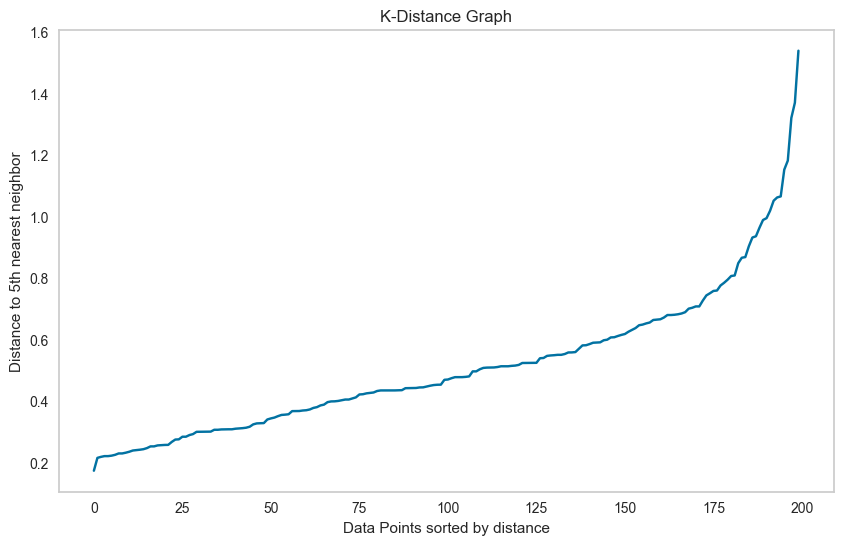

In [190]:
# Sorting the distances

import numpy as np

k_distances = np.sort(k_distances)

plt.figure(figsize=(10, 6))
plt.plot(k_distances)
plt.title('K-Distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Distance to {}th nearest neighbor'.format(k))
plt.grid()
plt.show()

One way to choose eps is by looking at the knee point of the graph which is around the 170th data point. That maps to around 0.7 hence we should choose a slightly lower number around 0.5-0.6.

In [24]:
from itertools import product

# potential values of eps and min_samples
eps = np.arange(0.1,5,0.1) 
min_samples = np.arange(1,6) 

# combinations of eps and min_samples
param_combination = list(product(eps, min_samples))

In [17]:
from sklearn.metrics import silhouette_score

silhouette = []
no_of_clusters = []

for p in param_combination:
    DBScan_model = DBSCAN(eps=p[0], min_samples=p[1]).fit(numeric_df_scaled)
    
    # Get unique labels
    unique_labels = set(DBScan_model.labels_)
    no_of_clusters.append(len(np.unique(DBScan_model.labels_)))
    
    # Make sure there is more than 1 cluster
    if len(unique_labels) > 1 and -1 in unique_labels:  
        silhouette.append(silhouette_score(numeric_df_scaled, DBScan_model.labels_))
    else:
        silhouette.append(-1)  #Invalid score will be assigned as -1

In [18]:
# Sort by the silhouette sore to find the best combination of parameters
df = pd.DataFrame.from_records(param_combination, columns =['Eps', 'Min_samples'])   
df['Silhouette Score'] = silhouette
df['No of Clusters'] = no_of_clusters

df_sorted= df.sort_values(by='Silhouette Score', ascending=False)

# Filter out combinations that only gives 2 clusters (including outlier cluster)
df_sorted[df_sorted['No of Clusters']>2]

,Eps,Min_samples,Silhouette Score,No of Clusters
29,0.6,5,0.188038,3
24,0.5,5,0.184514,7
27,0.6,3,0.177936,4
16,0.4,2,0.160443,19
28,0.6,4,0.155274,4
17,0.4,3,0.151307,11
33,0.7,4,0.144587,3
32,0.7,3,0.139311,3
22,0.5,3,0.131576,9
18,0.4,4,0.113110,9


We choose eps: 0.5 and min_sample: 5 because it forms sufficient number of clusters of 7 while still having one of the highest silhouette score for combinations with more than 2 clusters. This also confirms our eps estimate from the knee point earlier.

In [19]:
DBScan_model = DBSCAN(eps=0.5, min_samples=5).fit(numeric_df_scaled)

# Add cluster label
numeric_df_scaled_clustered = numeric_df_scaled.copy()
numeric_df_scaled_clustered['Cluster Label'] = DBScan_model.labels_ 
numeric_df_scaled_clustered

,Age,Annual Income (k$),Spending Score (1-100),Cluster Label
0,-1.424569,-1.738999,-0.434801,-1
1,-1.281035,-1.738999,1.195704,0
2,-1.352802,-1.700830,-1.715913,-1
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,-1
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-1
196,0.441365,2.497807,-0.861839,-1
197,-0.491602,2.497807,0.923953,-1
198,-0.491602,2.917671,-1.250054,-1


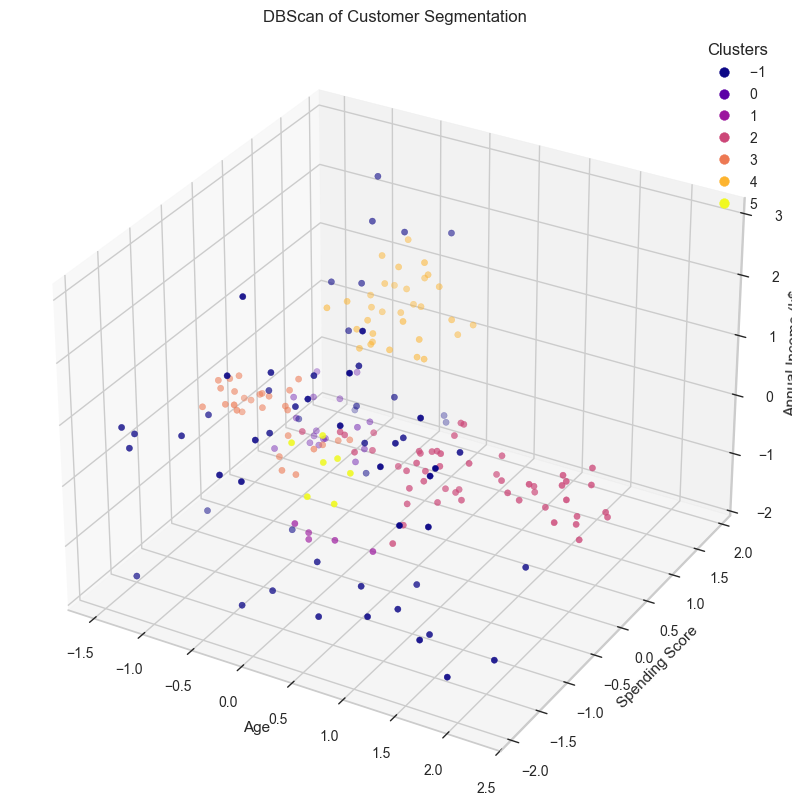

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#3D plot for DBSCAN clustering
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# scatter plot using DBSCAN clusters
scatter = ax.scatter(numeric_df_scaled_clustered['Age'], numeric_df_scaled_clustered['Spending Score (1-100)'],
                     numeric_df_scaled_clustered['Annual Income (k$)'], c=numeric_df_scaled_clustered['Cluster Label'], cmap='plasma')

#labels and title
ax.set_title('DBScan of Customer Segmentation')
ax.set_xlabel('Age')
ax.set_ylabel('Spending Score')
ax.set_zlabel('Annual Income (k$')

# Showing color bar and legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")

plt.show()


Find Silhouette Score

In [21]:
from sklearn.metrics import silhouette_score

# Remove noise points 
cluster_labels = numeric_df_scaled_clustered['Cluster Label']
filtered_data = numeric_df_scaled_clustered[cluster_labels != -1]
X_filtered = filtered_data[['Age', 'Spending Score (1-100)','Annual Income (k$)']]
labels_filtered = filtered_data['Cluster Label']

# Calculating the silhouette score
score = silhouette_score(X_filtered, labels_filtered)
print(f'Silhouette Score for DBSCAN: {score}')

Silhouette Score for DBSCAN: 0.48171491786230414


Find DBI Score

In [22]:
from sklearn.metrics import davies_bouldin_score

# Remove noise points 
dbscan_labels = numeric_df_scaled_clustered['Cluster Label']
filtered_data = numeric_df_scaled_clustered[dbscan_labels != -1]
X_filtered = filtered_data[['Age', 'Spending Score (1-100)','Annual Income (k$)']]
labels_filtered = filtered_data['Cluster Label']

# Calculating the Davies-Bouldin Index
dbi = davies_bouldin_score(X_filtered, labels_filtered)
print(f'Davies-Bouldin Index for DBSCAN: {dbi}')

Davies-Bouldin Index for DBSCAN: 0.638574875248808
